# Convnets with small datasets(cats vs dogs)
# copyright of deep-learning with python(François Chollet), edited and noted by Stella

In [ ]:
from platform import python_version
import keras
import os, shutil
print(keras.__version__)
print(python_version())

2.9.0
3.7.15


In [ ]:
# setup dataset dir
original_dataset_dir = "/content/dogs-vs-cats"
original_train_dir = "/content/dogs-vs-cats/train"
original_test1_dir = "/content/dogs-vs-cats/test1"
base_dir = '/content/dogs-vs-cats/cats_and_dogs_base'
# os.mkdir(base_dir)

In [ ]:
print('ls original_dataset_dir:', len(os.listdir(original_dataset_dir)))
print('ls dogs-vs-cats base dir:', len(os.listdir(base_dir)))
print('ls original_train_dir:', len(os.listdir(original_train_dir))) # cat0-12499 dog0-12499
print('ls original_test1_dir:', len(os.listdir(original_test1_dir))) # 1-12500 no label

ls original_dataset_dir: 8
ls dogs-vs-cats base dir: 3
ls original_train_dir: 25031
ls original_test1_dir: 12520


In [ ]:
'''train contents 15k cat + 15k dog. Train as a base_dir, was devided into train，validation，test'''
# Create Training dir
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

# Create validation dir
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

# Create test dir
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

# Create Training cat dir
train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

# Create Training dog dir
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

# Create validation cat dir
validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

# Create validation dog dir
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

# Create test cat dir
test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

# Create test dog dir
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

# Split photos to respective directory

In [ ]:
# display original_train_dir
original_train_dir

'/content/gdrive/MyDrive/248P/dogs-vs-cats/train'

In [ ]:
'''split cat images from original train dir to corresponding new dirs'''

# Copy first 1000[0-1000) cat images from original_train to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_train_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500[1000-1500) cat images from original_train to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_train_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500[1500-2000) cat images from original_train to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_train_dir,fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    


In [ ]:
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_train_dir,fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500[1000-1500) dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_train_dir,fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500[1500-2000) dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_train_dir,fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# 2000 training images, 1000 validation, 1000 test. 

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# Building Convnet for binary without augmentaion and dropout
Augment the capacity of the network, further reduce the size of the feature maps, so that they aren't overly large when we reach the Flatten layer. 

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
#inputs 150*150, end up with feature maps 7x7 right before the Flatten layer.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 

# depth of the feature maps is progressively increasing in the network (from 32 to 128)
# while the size of the feature maps is decreasing (from 148x148 to 7x7)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # binary classification problem, a Dense layer of size 1(sigmoid)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


# Data preprocessing
As you already know by now, data should be formatted into appropriately pre-processed floating point tensors before being fed into our network. Currently, our data sits on a drive as JPEG files, so the steps for getting it into our network are roughly:

Read the picture files.
Decode the JPEG content to RBG grids of pixels.
Convert these into floating point tensors.
Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).
It may seem a bit daunting, but thankfully Keras has utilities to take care of these steps automatically. Keras has a module with image processing helper tools, located at keras.preprocessing.image. In particular, it contains the class ImageDataGenerator which allows to quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. This is what we will use here.

In [ ]:
'''current version: python 3.7, keras 2.9'''
from keras.preprocessing.image import ImageDataGenerator # depricated
# from keras.utils import image_dataset_from_directory

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let's take a look at the output of one of these generators: it yields batches of 150x150 RGB images (shape (20, 150, 150, 3)) and binary labels (shape (20,)). 20 is the number of samples in each batch (the batch size). 

In [ ]:
'''generator yields these batches indefinitely:  loops endlessly over the images present in the target folder. '''

# break the iteration loop at some point
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# fit our model to the data using the generator.
We do it using the fit_generator method, the equivalent of fit for data generators like ours. It expects as first argument a Python generator that will yield batches of inputs and targets indefinitely, like ours does. Because the data is being generated endlessly, the generator needs to know example how many samples to draw from the generator before declaring an epoch over. This is the role of the steps_per_epoch argument: after having drawn steps_per_epoch batches from the generator, i.e. after having run for steps_per_epoch gradient descent steps, the fitting process will go to the next epoch. In our case, batches are 20-sample large, so it will take 100 batches until we see our target of 2000 samples.

When using fit_generator, one may pass a validation_data argument, much like with the fit method. Importantly, this argument is allowed to be a data generator itself, but it could be a tuple of Numpy arrays as well. If you pass a generator as validation_data, then this generator is expected to yield batches of validation data endlessly, and thus you should also specify the validation_steps argument, which tells the process how many batches to draw from the validation generator for evaluation.

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 1240s 12s/step - loss: 0.6941 - acc: 0.5165 - val_loss: 0.6771 - val_acc: 0.5840
Epoch 2/30
100/100 [==============================] - 13s 134ms/step - loss: 0.6653 - acc: 0.5905 - val_loss: 0.6472 - val_acc: 0.6410
Epoch 3/30
100/100 [==============================] - 13s 134ms/step - loss: 0.6222 - acc: 0.6605 - val_loss: 0.6172 - val_acc: 0.6570
Epoch 4/30
100/100 [==============================] - 13s 133ms/step - loss: 0.5814 - acc: 0.7020 - val_loss: 0.5898 - val_acc: 0.6810
Epoch 5/30
100/100 [==============================] - 13s 135ms/step - loss: 0.5463 - acc: 0.7175 - val_loss: 0.5848 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 13s 132ms/step - loss: 0.5164 - acc: 0.7375 - val_loss: 0.5920 - val_acc: 0.6780
Epoch 7/30
100/100 [==============================] - 13s 132ms/step - loss: 0.4946 - acc: 0.7655 - val_loss: 0.6037 - val_acc: 0.6740
Epoch 8/30
100/100 [==============================] - 1

In [ ]:
# save your models after training:
model.save('cats_and_dogs_small_1.h5')

In [ ]:
# get current dir to find where .h5 goes
import os;
print(os.getcwd())

/content


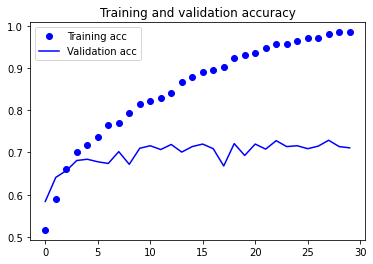

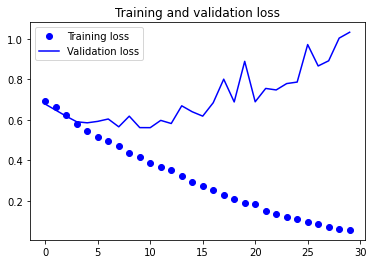

In [ ]:
# plot the loss and accuracy of the model over the training and validation data during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These plots are characteristic of overfitting. Our training accuracy increases linearly over time, until it reaches nearly 100%, while our validation accuracy stalls at 70-72%. Our validation loss reaches its minimum after only five epochs then stalls, while the training loss keeps decreasing linearly until it reaches nearly 0.

Because we only have relatively few training samples (2000), overfitting is going to be our number one concern. You already know about a number of techniques that can help mitigate overfitting, such as dropout and weight decay (L2 regularization). We are now going to introduce a new one, specific to computer vision, and used almost universally when processing images with deep learning models: data augmentation.

# Using data augmentation
Overfitting is caused by having too few samples to learn from, rendering us unable to train a model able to generalize to new data. Given infinite data, our model would be exposed to every possible aspect of the data distribution at hand: we would never overfit. Data augmentation takes the approach of generating more training data from existing training samples, by "augmenting" the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, our model would never see the exact same picture twice. This helps the model get exposed to more aspects of the data and generalize better.

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,        # a value in degrees (0-180),a range within which to randomly rotate pictures.
      width_shift_range=0.2,    # as a fraction of total width or height
      height_shift_range=0.2,   # within which to randomly translate pictures vertically or horizontally
      shear_range=0.2,          # for randomly applying shearing transformations
      zoom_range=0.2,           # for randomly zooming inside pictures
      horizontal_flip=True,     # for randomly flipping half of the images horizontally 
      fill_mode='nearest')      # the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


In [ ]:
# alias can't be used to import other module like tf.keras.utils
# tf version 2.9.0 the img_to_array moved to utlis
import tensorflow as tf 
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.2


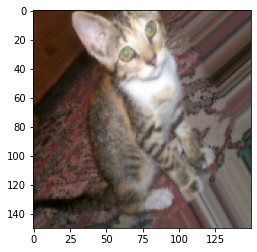

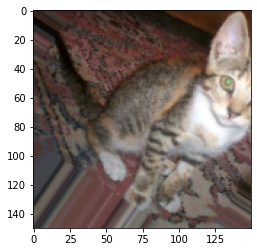

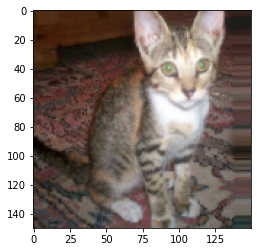

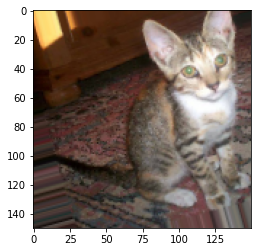

In [ ]:
# This is module with image preprocessing utilities
# from keras.preprocessing import image
from keras.utils import img_to_array

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
# img = image.load_img(img_path, target_size=(150, 150)) # this doesn't work anymore in new version
img = keras.utils.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = keras.utils.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    # imgplot = plt.imshow(image.array_to_img(batch[0]))
    imgplot = plt.imshow(keras.utils.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

# Train a new network using data augmentation configuration
Our network will never see twice the same input. However, the inputs that it sees are still heavily intercorrelated, since they come from a small number of original images -- we cannot produce new information, we can only remix existing information. As such, this might not be quite enough to completely get rid of overfitting. 

In [ ]:
# build new network
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # add a Dropout layer to our model To further fight overfitting
model.add(layers.Dense(512, activation='relu')) # without this layer, it runs out of data
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
# train our network using data augmentation and dropout:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        
        train_dir,              # This is the target directory       
        target_size=(150, 150), # All images will be resized to 150x150
        batch_size=32,
        class_mode='binary')    # binary_crossentropy loss need binary labels

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      # steps_per_epoch=100, # len(X_train)//batch_size 2000//32=62
      steps_per_epoch=62,
      epochs=100,
      validation_data=validation_generator,
      # validation_steps=50  # len(X_test)//batch_size 1000//32=31
      validation_steps=31
      )

NameError: ignored

In [ ]:
model.save('cats_and_dogs_small_2.h5')

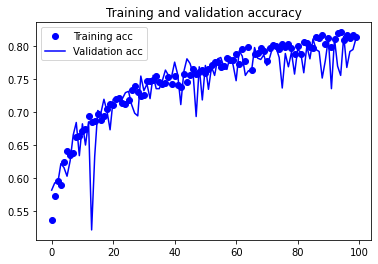

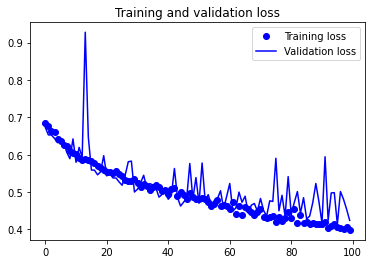

In [ ]:
# plot our results again
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Thanks to data augmentation and dropout, we are no longer overfitting: the training curves are rather closely tracking the validation curves. We are now able to reach an accuracy of 81%, a 15% relative improvement over the non-regularized model.

By leveraging regularization techniques even further and by tuning the network's parameters (such as the number of filters per convolution layer, or the number of layers in the network), we may be able to get an even better accuracy, likely up to 86-87%. However, it would prove very difficult to go any higher just by training our own convnet from scratch, simply because we have so little data to work with. As a next step to improve our accuracy on this problem, we will have to leverage a pre-trained model, which will be the focus of the next two sections.